In [1]:
import matplotlib.pyplot as plt

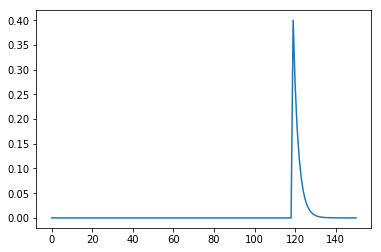

Первый начальный момент: 121.500
Он же математическое ожидание: 121.500
Через параметры распределения: 121.500


In [2]:
from scipy.stats import expon

λ = 0.4
loc = 119.0
# восстановим экспоненциальное распределение, полученное по данным
ξ = expon(scale=1./λ, loc=loc)

# построим график случайной величины
plt.plot([ξ.pdf(i) for i in range(0, 151)])
plt.show()

# первый начальный момент - это оценка среднего значения случайно величины
# для несмещённого экспоненциального распределения он рассчитывается как 1/λ
# в нашем же примере нужно добавить смещение
print("Первый начальный момент: {:.3f}".format(ξ.moment(1)))
print("Он же математическое ожидание: {:.3f}".format(ξ.mean()))
print("Через параметры распределения: {:.3f}".format(1./λ + loc))

In [3]:
prob125minus = ξ.cdf(125)
max095time = ξ.ppf(0.95)
print("Вероятность ответа меньше чем за 125 мс: {:.3f}%".format(prob125minus * 100))
print("Максимальное время ответа для 95% пользователей: {:.3f} мс".format(max095time))

Вероятность ответа меньше чем за 125 мс: 90.928%
Максимальное время ответа для 95% пользователей: 126.489 мс


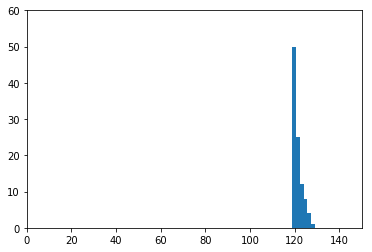

In [4]:
with open('data/times.log', 'r') as f:
    # убираем сервисные строчки, приводим к числу и берём первые 100
    data = [float(v) for v in f.readlines()[1:-4]][:100]

bin_count = 6
h = plt.hist(data, bin_count)
plt.axis([0, 150, 0, 60])
plt.show()

In [5]:
mean = sum(data) / len(data)
print("Среднее выборочное = {:.2f} мс".format(mean))

prob125 = len(list(filter(lambda x: x < 125, data))) / len(data) 
perc95 = sorted(data)[int(0.95 * len(data))]

print("Статистика 'доля ниже 125': {:.2f}%".format(prob125 * 100))
print("0.95-квантиль (95-процентиль): {:.2f} мс".format(perc95))

Среднее выборочное = 121.21 мс
Статистика 'доля ниже 125': 92.00%
0.95-квантиль (95-процентиль): 126.00 мс
